In [1]:
import numpy as np
import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear
import time

In [3]:
###Testing a gym environment (Aliean-v0) environment with random actions 

env1 = gym.make("CartPole-v1", render_mode="human")
env1.reset()
score = 0

for _ in range(100):
    next_state, reward, done, info,a = env1.step(env1.action_space.sample())
    score =+ reward
    env1.render()
    print(score)

    if done:
        initial_state = env1.reset()
    
env1.close()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [13]:
class DQN:

    """ Iplementing a  deep Q learning algorithm """

    def __init__(self,action_space,observation_space,episode,env):
        """Hyper Parameters"""
        self.action_space = action_space
        self.observation_space = observation_space
        self.epsilon = 1.0
        self.epsilon_max = 1
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.996
        self.gamma = 0.99      
        self.memory = deque(maxlen=1000000)
        self.batch_size = 64
        self.learning_rate = 0.001
        self.episode = episode
        self.env = env
        self.NN_model = self.build_NNmodel()
        self.env = env

    def build_NNmodel(self):

        NN_model = Sequential()
        NN_model.add(Dense(124, input_dim=self.observation_space, activation=relu))
        NN_model.add(Dense(124, activation=relu))
        NN_model.add(Dense(self.action_space, activation=linear))
        NN_model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return NN_model

    def save_to_memory(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def Take_action(self, state):
        """Allowing the agent to take random actions  as well as 
        actions from NN to allow exploration as well as exploitation"""
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.NN_model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):
        """Updating Q values"""
        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([data[0] for data in minibatch])
        actions = np.array([data[1] for data in minibatch])
        rewards = np.array([data[2] for data in minibatch])
        next_states = np.array([data[3] for data in minibatch])
        dones = np.array([data[4] for data in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        Q = self.NN_model.predict_on_batch(states) #  Predicted Q-values
        Q_sa = self.NN_model.predict_on_batch(next_states)
        targets = rewards + self.gamma*(np.amax(Q_sa, axis=1))*(1-dones)
        index = np.array([i for i in range(self.batch_size)]) 
        Q[[index], [actions]] = targets 
    

        self.NN_model.fit(states, Q, epochs=1, verbose=0) 
        
        self.epsilon = self.epsilon_min + (self.epsilon_max - self.epsilon_min)* np.exp(-self.epsilon_decay*self.episode)
                


def train_dqn(episode,max_steps,env):

    loss = []
    DQN_agent = DQN(env.action_space.n, np.prod(env.observation_space.shape) ,episode,env)
    for e in range(episode):
        state = env.reset()
        ###reshaping state to fit the input of layer of NN
        state = np.reshape(state[0], [1, DQN_agent.observation_space]) 
        
        
        
        
        score = 0
        for i in range(max_steps):
            action = DQN_agent.Take_action(state)
            env.render()
            
            next_state, reward, done, truncated,info= env.step(action)
            score += reward
            ###reshaping next_state to fit the input of layer of NN
            next_state = np.reshape(next_state, [1, DQN_agent.observation_space])

            DQN_agent.save_to_memory(state, action, reward, next_state, done)
            state = next_state
            DQN_agent.replay()
            if done or truncated:
                print(F"episode: {e}/{episode}, score: {score}")
                break
        loss.append(score)

        # Average score of last 50 episode
        Average_score = np.mean(loss[-50:])
        if Average_score > 200:
            print('\n Task Completed! \n')
            break
        print(f"Average over last 50 episode: {Average_score} \n")
    return loss



observation_space =  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action_space =  Discrete(2)
episode: 0/50, score: 32.0
Average over last 50 episode: 32.0 

1/1 [==============================] - 0s 43ms/step
episode: 1/50, score: 33.0
Average over last 50 episode: 32.5 

1/1 [==============================] - 0s 17ms/step
episode: 2/50, score: 15.0
Average over last 50 episode: 26.666666666666668 

1/1 [==============================] - 0s 16ms/step
episode: 3/50, score: 10.0
Average over last 50 episode: 22.5 

1/1 [==============================] - 0s 16ms/step
episode: 4/50, score: 10.0
Average over last 50 episode: 20.0 

1/1 [==============================] - 0s 16ms/step
episode: 5/50, score: 18.0
Average over last 50 episode: 19.666666666666668 

1/1 [==============================] - 0s 16ms/step
episode: 6/50, score: 10.0
Average over last 50 episode: 18.285714285714285 

1/1 [===

1/1 [==============================] - 0s 16ms/step
episode: 11/50, score: 27.0
Average over last 50 episode: 18.166666666666668 

1/1 [==============================] - 0s 15ms/step
episode: 12/50, score: 69.0
Average over last 50 episode: 22.076923076923077 

1/1 [==============================] - 0s 15ms/step
episode: 13/50, score: 81.0
Average over last 50 episode: 26.285714285714285 

1/1 [==============================] - 0s 15ms/step
episode: 14/50, score: 24.0
Average over last 50 episode: 26.133333333333333 

1/1 [==============================] - 0s 16ms/step
episode: 15/50, score: 44.0
Average over last 50 episode: 27.25 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
episode: 16/50, score: 92.0
Average over last 50 episode: 31.058823529411764 

1/1 [==============================] - 0s 14ms/step
episode: 17/50, score: 104.0
Average over last 50 episode: 35.111111111111114 

1/1 [==============================] - 0s 15ms/step
episode: 18/50, score: 188.0
Average over last 50 episode: 43.1578947368421 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
episode: 19/50, score: 227.0
Average over last 50 episode: 52.35 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
episode: 20/50, score: 249.0
Average over last 50 episode: 61.714285714285715 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
episode: 21/50, score: 257.0
Average over last 50 episode: 70.5909090909091 

1/1 [==============================] - 0s 17ms/step
episode: 22/50, score: 179.0
Average over last 50 episode: 75.30434782608695 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
episode: 23/50, score: 177.0
Average over last 50 episode: 79.54166666666667 

1/1 [==============================] - 0s 16ms/step
episode: 24/50, score: 153.0
Average over last 50 episode: 82.48 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
episode: 25/50, score: 167.0
Average over last 50 episode: 85.73076923076923 

1/1 [==============================] - 0s 17ms/step
episode: 26/50, score: 175.0
Average over last 50 episode: 89.03703703703704 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 27/50, score: 179.0
Average over last 50 episode: 92.25 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
episode: 28/50, score: 210.0
Average over last 50 episode: 96.3103448275862 

1/1 [==============================] - 0s 17ms/step
episode: 29/50, score: 235.0
Average over last 50 episode: 100.93333333333334 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step
episode: 30/50, score: 215.0
Average over last 50 episode: 104.61290322580645 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 31/50, score: 214.0
Average over last 50 episode: 108.03125 

1/1 [==============================] - 0s 17ms/step
episode: 32/50, score: 204.0
Average over last 50 episode: 110.93939393939394 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
episode: 33/50, score: 214.0
Average over last 50 episode: 113.97058823529412 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
episode: 34/50, score: 267.0
Average over last 50 episode: 118.34285714285714 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
episode: 35/50, score: 246.0
Average over last 50 episode: 121.88888888888889 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 36/50, score: 254.0
Average over last 50 episode: 125.45945945945945 

1/1 [==============================] - 0s 19ms/step
episode: 37/50, score: 189.0
Average over last 50 episode: 127.13157894736842 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
episode: 38/50, score: 243.0
Average over last 50 episode: 130.10256410256412 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
episode: 39/50, score: 379.0
Average over last 50 episode: 136.325 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
episode: 40/50, score: 355.0
Average over last 50 episode: 141.65853658536585 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
episode: 41/50, score: 241.0
Average over last 50 episode: 144.02380952380952 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step
episode: 42/50, score: 214.0
Average over last 50 episode: 145.65116279069767 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
episode: 43/50, score: 299.0
Average over last 50 episode: 149.13636363636363 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
episode: 44/50, score: 361.0
Average over last 50 episode: 153.84444444444443 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
episode: 45/50, score: 317.0
Average over last 50 episode: 157.3913043478261 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step
episode: 46/50, score: 354.0
Average over last 50 episode: 161.5744680851064 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step
episode: 47/50, score: 329.0
Average over last 50 episode: 165.0625 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step
episode: 48/50, score: 333.0
Average over last 50 episode: 168.48979591836735 



1/1 [==============================] - 0s 20ms/step
episode: 49/50, score: 299.0
Average over last 50 episode: 171.1 



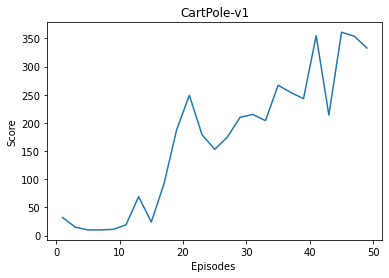

In [5]:
env2 = gym.make("CartPole-v1",  render_mode="human")
print("observation_space = ",env2.observation_space)
print("action_space = ",env2.action_space)
episodes2 = 50
loss_CartPole = train_dqn(episodes2,max_steps = 1000,env2)


plt.plot([i+1 for i in range(0, len(loss_CartPole), 2)], loss_CartPole[::2])
plt.title("CartPole-v1")
plt.xlabel('Episodes ')
plt.ylabel('Score')
plt.show()

Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)
Discrete(3)
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step
episode: 0/50, score: -500.0
Average over last 50 episode: -500.0 

1/1 [==============================] - 0s 19ms/step
episode: 1/50, score: -95.0
Average over last 50 episode: -297.5 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step
episode: 2/50, score: -115.0
Average over last 50 episode: -236.66666666666666 

1/1 [==============================] - 0s 21ms/step
episode: 3/50, score: -96.0
Average over last 50 episode: -201.5 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step
episode: 4/50, score: -371.0
Average over last 50 episode: -235.4 

1/1 [==============================] - 0s 22ms/step
episode: 5/50, score: -132.0
Average over last 50 episode: -218.16666666666666 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step
episode: 6/50, score: -98.0
Average over last 50 episode: -201.0 

1/1 [==============================] - 0s 23ms/step
episode: 7/50, score: -110.0
Average over last 50 episode: -189.625 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step
episode: 8/50, score: -173.0
Average over last 50 episode: -187.77777777777777 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step
episode: 9/50, score: -123.0
Average over last 50 episode: -181.3 

1/1 [==============================] - 0s 24ms/step
episode: 10/50, score: -153.0
Average over last 50 episode: -178.72727272727272 

1/1 [==============================] - 0s 22ms/step
episode: 11/50, score: -123.0
Average over last 50 episode: -174.08333333333334 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step
episode: 12/50, score: -115.0
Average over last 50 episode: -169.53846153846155 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step
episode: 13/50, score: -144.0
Average over last 50 episode: -167.71428571428572 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step
episode: 14/50, score: -265.0
Average over last 50 episode: -174.2 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step
episode: 15/50, score: -156.0
Average over last 50 episode: -173.0625 

1/1 [==============================] - 0s 29ms/step
episode: 16/50, score: -230.0
Average over last 50 episode: -176.41176470588235 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step
episode: 17/50, score: -151.0
Average over last 50 episode: -175.0 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step
episode: 18/50, score: -254.0
Average over last 50 episode: -179.1578947368421 

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step
episode: 19/50, score: -117.0
Average over last 50 episode: -176.05 

1/1 [==============================] - 0s 27ms/step
episode: 20/50, score: -130.0
Average over last 50 episode: -173.85714285714286 

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step
episode: 21/50, score: -500.0
Average over last 50 episode: -188.6818181818182 

1/1 [==============================] - 0s 23ms/step
episode: 22/50, score: -103.0
Average over last 50 episode: -184.95652173913044 

1/1 [==============================] - 0s 27ms/step
episode: 23/50, score: -113.0
Average over last 50 episode: -181.95833333333334 

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step
episode: 24/50, score: -95.0
Average over last 50 episode: -178.48 

1/1 [==============================] - 0s 34ms/step
episode: 25/50, score: -176.0
Average over last 50 episode: -178.3846153846154 

1/1 [==============================] - 0s 26ms/step
episode: 26/50, score: -105.0
Average over last 50 episode: -175.66666666666666 

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 24ms/step
episode: 27/50, score: -132.0
Average over last 50 episode: -174.10714285714286 

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step
episode: 28/50, score: -106.0
Average over last 50 episode: -171.75862068965517 

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step
episode: 29/50, score: -141.0
Average over last 50 episode: -170.73333333333332 

1/1 [==============================] - 0s 26ms/step
episode: 30/50, score: -89.0
Average over last 50 episode: -168.09677419354838 

1/1 [==============================] - 0s 31ms/step
episode: 31/50, score: -161.0
Average over last 50 episode: -167.875 



1/1 [==============================] - 0s 51ms/step
episode: 32/50, score: -152.0
Average over last 50 episode: -167.3939393939394 

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 24ms/step
episode: 33/50, score: -145.0
Average over last 50 episode: -166.73529411764707 

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step
episode: 34/50, score: -128.0
Average over last 50 episode: -165.62857142857143 

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step
episode: 35/50, score: -93.0
Average over last 50 episode: -163.61111111111111 

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 22ms/step
episode: 36/50, score: -243.0
Average over last 50 episode: -165.75675675675674 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 30ms/step
episode: 37/50, score: -161.0
Average over last 50 episode: -165.6315789473684 

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step
episode: 38/50, score: -125.0
Average over last 50 episode: -164.5897435897436 

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 24ms/step
episode: 39/50, score: -110.0
Average over last 50 episode: -163.225 

1/1 [==============================] - 0s 24ms/step
episode: 40/50, score: -83.0
Average over last 50 episode: -161.26829268292684 

1/1 [==============================] - 0s 26ms/step
episode: 41/50, score: -146.0
Average over last 50 episode: -160.9047619047619 

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step
episode: 42/50, score: -156.0
Average over last 50 episode: -160.7906976744186 

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step
episode: 43/50, score: -111.0
Average over last 50 episode: -159.6590909090909 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step
episode: 44/50, score: -83.0
Average over last 50 episode: -157.95555555555555 

1/1 [==============================] - 0s 29ms/step
episode: 45/50, score: -117.0
Average over last 50 episode: -157.06521739130434 

1/1 [==============================] - 0s 27ms/step
episode: 46/50, score: -144.0
Average over last 50 episode: -156.7872340425532 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step
episode: 47/50, score: -95.0
Average over last 50 episode: -155.5 

1/1 [==============================] - 0s 32ms/step
episode: 48/50, score: -130.0
Average over last 50 episode: -154.9795918367347 

1/1 [==============================] - 0s 25ms/step
episode: 49/50, score: -110.0
Average over last 50 episode: -154.08 



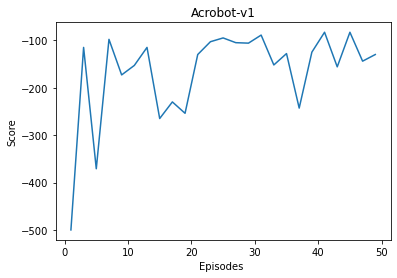

In [6]:
env3 = gym.make('Acrobot-v1',  render_mode="human")
print(env3.observation_space)
print(env3.action_space)
episodes3 = 50
loss_Acrobot = train_dqn(episodes3,max_steps = 1000,env3)

plt.plot([i+1 for i in range(0, len(loss_Acrobot), 2)], loss_Acrobot[::2])
plt.title("Acrobot-v1")
plt.xlabel('Episodes ')
plt.ylabel('Score')
plt.show()

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Discrete(4)
1/1 [==============================] - 0s 20ms/step
episode: 0/50, score: -88.06295189032961
Average over last 50 episode: -88.06295189032961 

1/1 [==============================] - 0s 17ms/step
episode: 1/50, score: -610.9781804487467
Average over last 50 episode: -349.52056616953814 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
episode: 2/50, score: -179.72006887000674
Average over last 50 episode: -292.9204004030277 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
episode: 3/50, score: -266.2794502956428
Average over last 50 episode: -286.2601628761815 

1/1 [==============================] - 0s 19ms/step
episode: 4/50, score: -231.1905277181758
Average over last 50 episode: -275.2462358445804 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
episode: 5/50, score: -153.948840621508
Average over last 50 episode: -255.03000330740164 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step
episode: 6/50, score: -250.02318018196303
Average over last 50 episode: -254.3147428609104 

1/1 [==============================] - 0s 16ms/step
episode: 7/50, score: -40.034480806245455
Average over last 50 episode: -227.52971010407725 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
episode: 8/50, score: -129.14586686360815
Average over last 50 episode: -216.59817196624738 

1/1 [==============================] - 0s 17ms/step
episode: 9/50, score: -152.52664280324802
Average over last 50 episode: -210.1910190499474 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
episode: 10/50, score: -268.07028658030754
Average over last 50 episode: -215.45277064361653 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step
episode: 11/50, score: 22.254679244659386
Average over last 50 episode: -195.64381648626022 

1/1 [==============================] - 0s 15ms/step
episode: 12/50, score: -125.17181705039435
Average over last 50 episode: -190.22289345273208 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 13/50, score: -107.19459997180732
Average over last 50 episode: -184.29230106123745 

1/1 [==============================] - 0s 17ms/step
episode: 14/50, score: 13.294950279244759
Average over last 50 episode: -171.11981763853865 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
episode: 15/50, score: -69.53001802657886
Average over last 50 episode: -164.77045516279117 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
episode: 16/50, score: -169.513182482718
Average over last 50 episode: -165.04943912278688 



1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
episode: 17/50, score: -40.945072757493186
Average over last 50 episode: -158.15475210249278 

1/1 [==============================] - 0s 16ms/step
episode: 18/50, score: -69.59289356282285
Average over last 50 episode: -153.49360165303648 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
episode: 19/50, score: -149.65089813860857
Average over last 50 episode: -153.30146647731507 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
episode: 20/50, score: -103.13719572938923
Average over last 50 episode: -150.9126916797948 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
episode: 21/50, score: -51.27437176339329
Average over last 50 episode: -146.3836771381402 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
episode: 22/50, score: -55.2891709548764
Average over last 50 episode: -142.42304643452002 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
episode: 23/50, score: -68.96958322043822
Average over last 50 episode: -139.36248546726657 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
episode: 24/50, score: -246.95496301869358
Average over last 50 episode: -143.66618456932366 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 25/50, score: -56.79585655682844
Average over last 50 episode: -140.3250181073046 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
episode: 26/50, score: -267.25308691854326
Average over last 50 episode: -145.02605769290605 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
episode: 27/50, score: -118.69606984996518
Average over last 50 episode: -144.0857009842296 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
episode: 28/50, score: -67.50658794858649
Average over last 50 episode: -141.44504191403502 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
episode: 29/50, score: -38.445727566410135
Average over last 50 episode: -138.01173143578083 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
episode: 30/50, score: -15.83875615903618
Average over last 50 episode: -134.07066771717618 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
episode: 31/50, score: -134.6724064737743
Average over last 50 episode: -134.08947205331987 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step
episode: 32/50, score: -93.3083612894372
Average over last 50 episode: -132.8536808180507 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
episode: 33/50, score: -223.57440674178125
Average over last 50 episode: -135.52193746286628 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
episode: 34/50, score: -145.73346026168184
Average over last 50 episode: -135.81369525711816 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
episode: 35/50, score: -83.5973674412172
Average over last 50 episode: -134.36324170667646 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step
episode: 36/50, score: -70.10625023761298
Average over last 50 episode: -132.62656626156664 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 47ms/step
episode: 37/50, score: -65.57860267862742
Average over last 50 episode: -130.86214616727875 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step
episode: 38/50, score: -56.16393531699058
Average over last 50 episode: -128.94680742752777 

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step
episode: 39/50, score: -26.939388326691603
Average over last 50 episode: -126.39662195000687 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step
episode: 40/50, score: -29.0929990679623
Average over last 50 episode: -124.02336285532286 

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step
episode: 41/50, score: -25.67002662530008
Average over last 50 episode: -121.68161675460803 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step
episode: 42/50, score: -49.57529936322187
Average over last 50 episode: -120.00472565248279 

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step
episode: 43/50, score: -83.50680802957525
Average over last 50 episode: -119.17522752468943 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 25ms/step
episode: 44/50, score: -79.24040161744551
Average over last 50 episode: -118.28778694897288 

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step
episode: 45/50, score: -89.58689756040935
Average over last 50 episode: -117.66385457096062 

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step
episode: 46/50, score: -75.98797174579435
Average over last 50 episode: -116.77713365978687 

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step
episode: 47/50, score: -59.319734193266584
Average over last 50 episode: -115.5801045042344 

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step
episode: 48/50, score: -79.69251638708998
Average over last 50 episode: -114.84770474674167 

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 42ms/step
episode: 49/50, score: -83.20829684894238
Average over last 50 episode: -114.21491658878567 



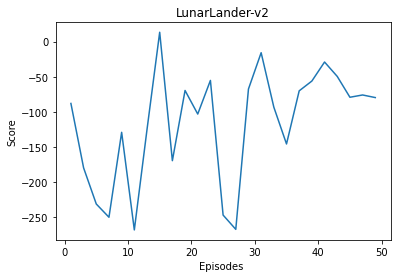

In [3]:
env4 = gym.make("LunarLander-v2", render_mode = "human" )
print(env4.observation_space)
print(env4.action_space)
episodes4 = 50
loss_LunarLander = train_dqn(episodes4,max_steps = 1000,env4)

plt.plot([i+1 for i in range(0, len(loss_LunarLander), 2)], loss_LunarLander[::2])
plt.title("LunarLander-v2")
plt.xlabel('Episodes ')
plt.ylabel('Score')
plt.show()

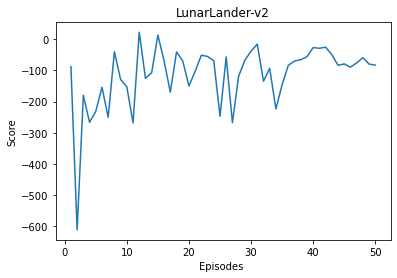

In [7]:
plt.plot([i+1 for i in range(0, len(loss_LunarLander))], loss_LunarLander[])
plt.title("LunarLander-v2")
plt.xlabel('Episodes ')
plt.ylabel('Score')
plt.show()